<a href="https://colab.research.google.com/github/DianaTorresV/Time_Series_Forecasting_Project/blob/main/Week_2_(ARIMA)_Project_Corporaci%C3%B3n_Favorita_Grocery_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Times Series Forescasting Project

#Week 2 (ARIMA)

* ARIMA Implementation:
  * Filter to date frame until March 2014.
  * Filter to the most sold item in the store with more sales on this product to apply ARIMA model on 1 item, 1 store
  * Check if time series is stationary by running ADF test
  * use ACF and PACF to determine parameters of the ARIMA model

*   Implement Filter on data date frame: January-March 2014, including March

*   Feature engineering:
*   Split the dataset into training and testing portions
*   Split the target variable from the features for both training and testing portions of data.

##Applied Filters:
Analysis until March 2014, including March

In [ ]:
#Libraries
!pip install darts
import pandas as pd
from darts import TimeSeries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from darts.models import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller #ADF test

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

#Week 2 Development

Loading and Preparing the Dataset

In [ ]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the CSV files to Pandas Dataframes
df_stores = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/stores.csv')
# Load the CSV files into pandas DataFrames
df_items = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/items.csv')
df_transactions = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/transactions.csv')
df_oil = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/oil.csv')
df_holidays_events = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/holidays_events.csv')

# Note: train file is very large. We will use filters and chunks

###Filters: Until March 2014, best sold item ( item_nbr='257847' with sum_unit_sales= 320367), best store where the item were sold(Selected item and store: item_nbr='257847' and store_nbr='51 with sum_unit_sales= 114306)

In [ ]:
# Let's filter the data for one store and one item to keep it simple
store_ids = [51] # the store that we select
item_ids = [257847] # the item that we select

# Select data before April'14
max_date = '2014-04-01'

# Initialize an empty list to hold filtered chunks
filtered_chunks = []

# Define the chunk size (number of rows per chunk)
chunk_size = 10 ** 6  # Adjust based on your system's memory capacity

# Read the CSV file in chunks
for chunk in pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/train.csv', chunksize=chunk_size):
    # Filter the chunk for the desired store IDs
    chunk_filtered = chunk[(chunk['store_nbr'].isin(store_ids)) & (chunk['item_nbr'].isin(item_ids)) & (chunk['date']<max_date)]
    # Append the filtered chunk to the list
    filtered_chunks.append(chunk_filtered)
    # Optional: Delete the chunk to free up memory
    del chunk

# Concatenate all filtered chunks into a single DataFrame
df_filtered = pd.concat(filtered_chunks, ignore_index=True)

# Clean up to free memory
del filtered_chunks

<ipython-input-16-149ee3b0387d>:15: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/train.csv', chunksize=chunk_size):


In [ ]:
df_filtered.shape

(452, 6)

In [ ]:
df_filtered.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,40733,2013-01-02,51,257847,355.0,NaN
1,80851,2013-01-03,51,257847,119.0,NaN
2,120908,2013-01-04,51,257847,295.0,NaN
3,163366,2013-01-05,51,257847,331.0,NaN
4,205218,2013-01-06,51,257847,321.0,NaN


In [ ]:
df_filtered['date'].min()

'2013-01-02'

### Filter to the most sold item in the store with more sales to apply ARIMA on 1 item, 1 store

Selected item: item_nbr='257847' with sum_unit_sales= 320367

Selected item and store: item_nbr='257847' and store_nbr='51 with sum_unit_sales= 114306

##ARIMA Method

In [ ]:

df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Group by date and aggregate sales for each day
df_filtered1 = df_filtered.groupby('date').sum()['unit_sales'].reset_index()

# Setting an index after the aggregation made
df_filtered1.set_index('date', inplace=True)

# Fill missing dates with zero sales (since some dates may have no sales)
df_filtered1 = df_filtered1.asfreq('D').fillna(0)

# Convert to a Darts TimeSeries object
series = TimeSeries.from_dataframe(df_filtered1, value_cols='unit_sales')

In [ ]:
df_filtered1

,unit_sales
date,
2013-01-02,355.0
2013-01-03,119.0
2013-01-04,295.0
2013-01-05,331.0
2013-01-06,321.0
...,...
2014-03-27,146.0
2014-03-28,202.0
2014-03-29,212.0


In [ ]:
ts_filtered1 = pd.Series(data = df_filtered1['unit_sales'].values)
ts_filtered1.index=df_filtered1.index
ts_filtered1

,0
date,
2013-01-02,355.0
2013-01-03,119.0
2013-01-04,295.0
2013-01-05,331.0
2013-01-06,321.0
...,...
2014-03-27,146.0
2014-03-28,202.0
2014-03-29,212.0


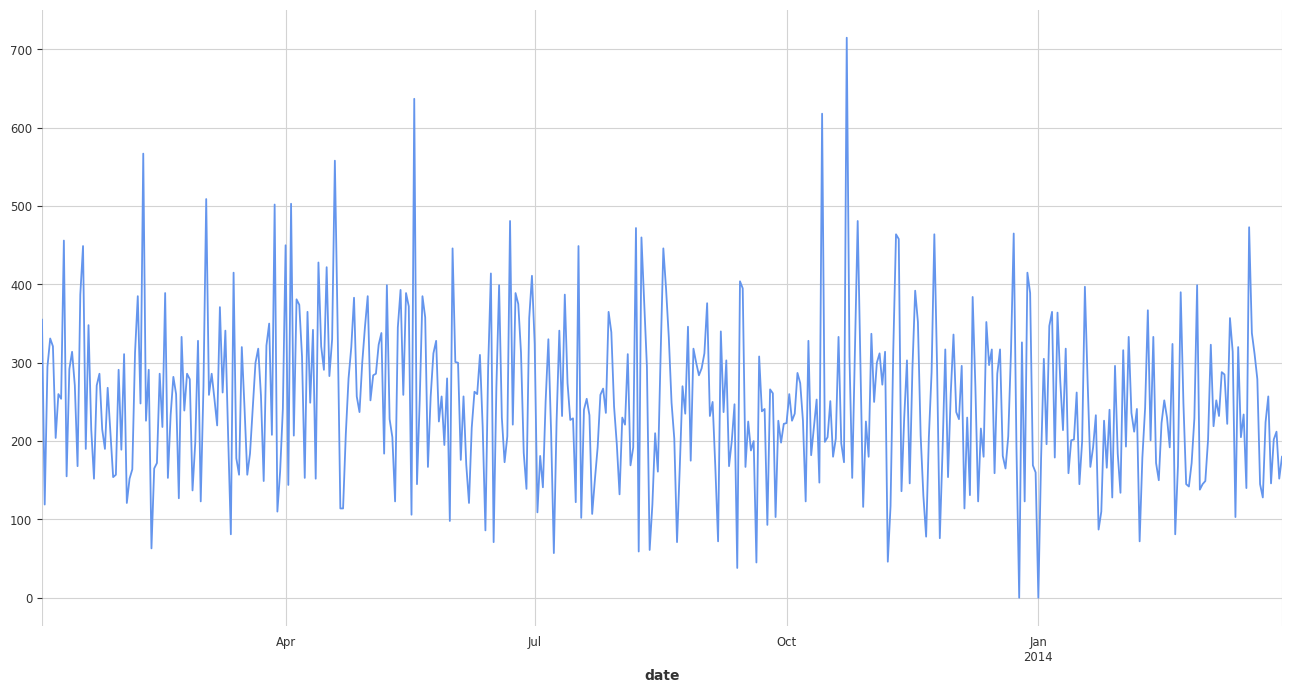

In [ ]:
# plot unit_sales column
plt.figure(figsize = (16,8))
ts_filtered1.plot(color='cornflowerblue')
plt.grid(color='lightgrey')
plt.show()

<Figure size 4000x2000 with 0 Axes>

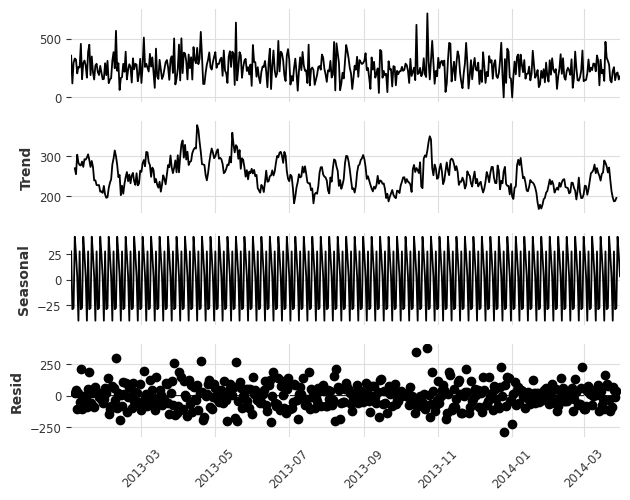

In [ ]:
# seasonal decomposition
result = seasonal_decompose(ts_filtered1)

#plot components
plt.figure(figsize = (40,20))
result.plot()
plt.xticks(rotation = 45)
plt.show()

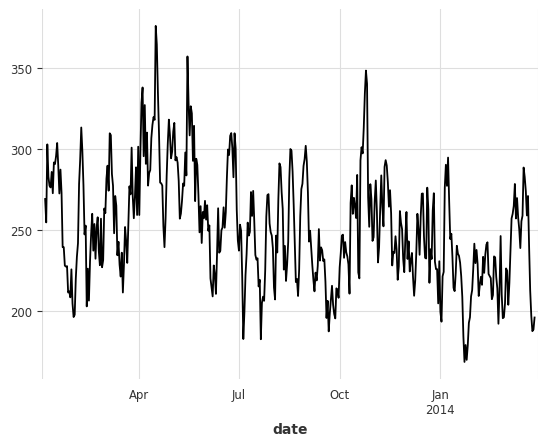

In [ ]:
result.trend.plot()
plt.show()

In [ ]:
df_filtered2=df_filtered1.diff().dropna()

<Figure size 4000x2000 with 0 Axes>

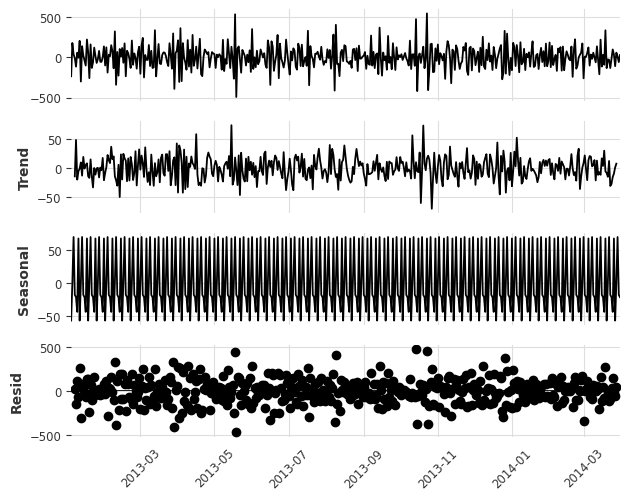

In [ ]:
# seasonal decomposition
result2 = seasonal_decompose(df_filtered2)

#plot components
plt.figure(figsize = (40,20))
result2.plot()
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df_filtered3=df_filtered2.diff().dropna()

<Figure size 4000x2000 with 0 Axes>

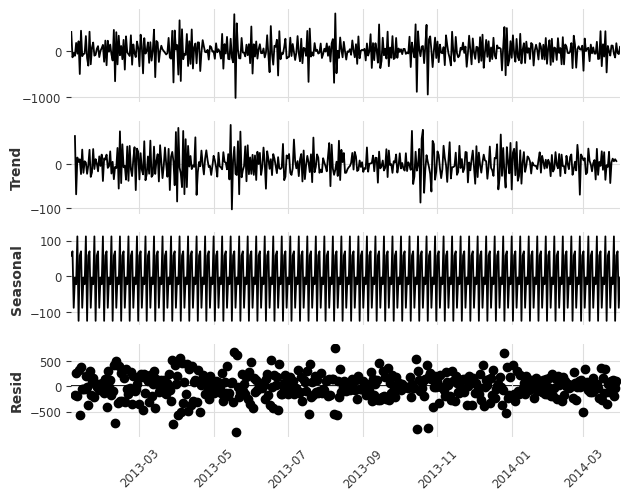

In [ ]:
# seasonal decomposition
result3 = seasonal_decompose(df_filtered3)

#plot components
plt.figure(figsize = (40,20))
result3.plot()
plt.xticks(rotation = 45)
plt.show()

###Check if time series is stationary by running ADF test

In [ ]:
adf_result = adfuller(ts_filtered1)
p_value = adf_result[1]
if p_value <= 0.05:
        print("The series is stationary (reject H0).")
else:
    print("The series is non-stationary (fail to reject H0).")

The series is stationary (reject H0).


The series is stationary so we can apply the ARIMA model

###ACF and PACF

<Figure size 640x480 with 0 Axes>

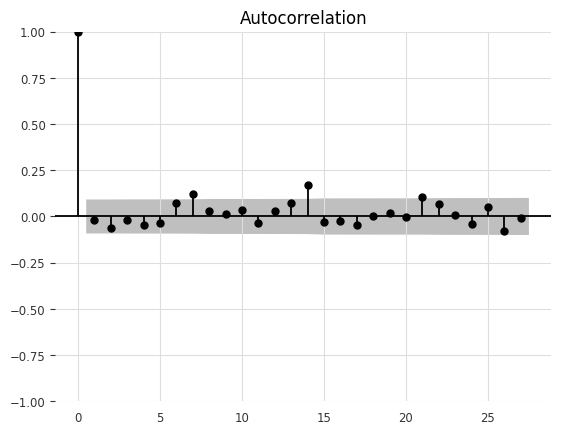

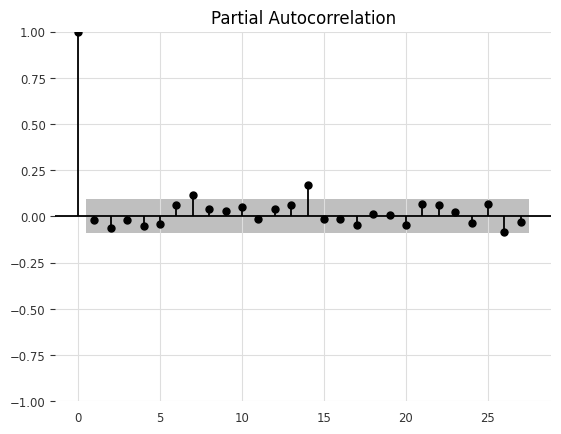

In [ ]:
plt.figure()
plot_acf(ts_filtered1)
plot_pacf(ts_filtered1)
plt.show()

ACF indicates that q=7
PACF indicates that p=7

In [ ]:
# Convert to a Darts TimeSeries object
series = TimeSeries.from_dataframe(df_filtered1, value_cols='unit_sales')

<Axes: xlabel='date'>

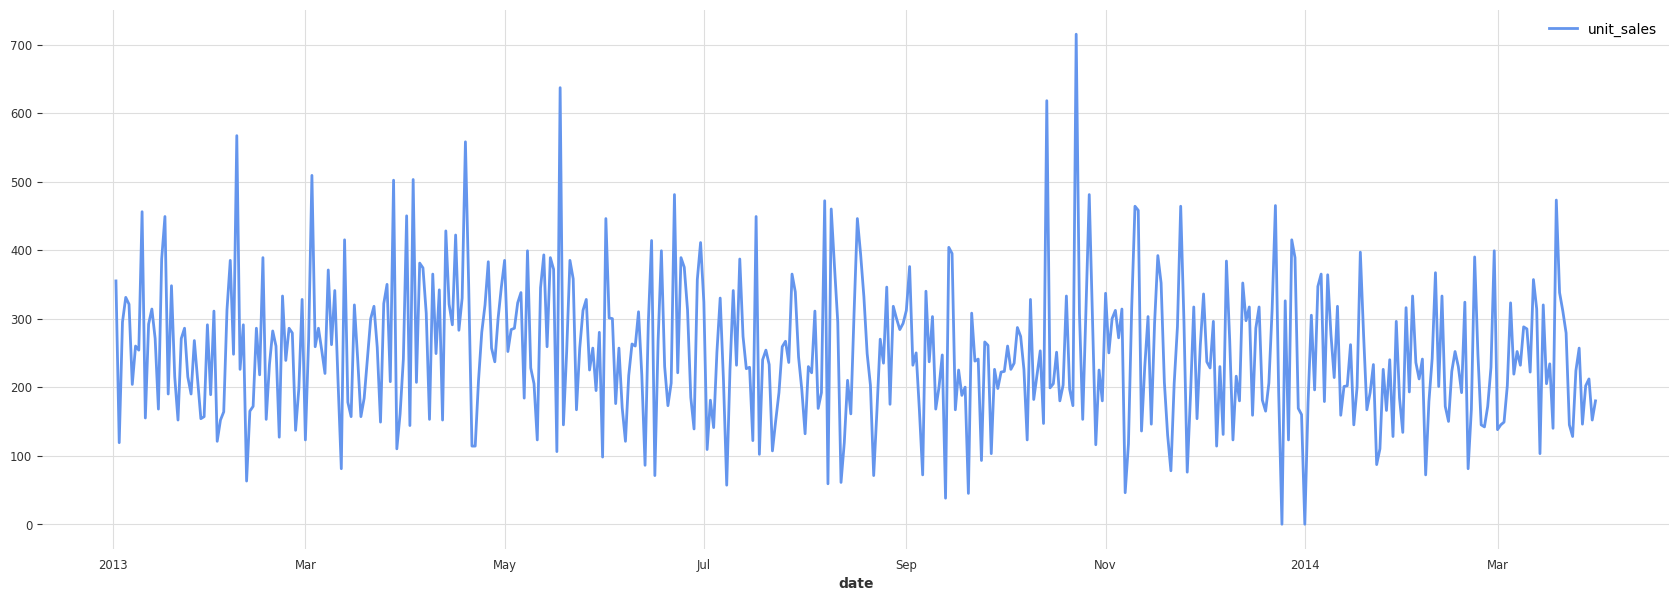

In [ ]:
# Visualize the filtered sales data
plt.figure(figsize=(21, 7))
series.plot(color='cornflowerblue')

###Splitting the Data into Training and Testing Sets to apply ARIMA model

In [ ]:
# Split the data (80% training, 20% testing)
train, test = series.split_after(0.8)

p=7: We are using previous observations (autoregressive terms).
d=1: The data is differenced once to make it stationary.
q=7:moving average terms are used.

In [ ]:
# Initialize ARIMA model with (p, d, q) parameters
arima_model = ARIMA(p=7, d=1, q=7)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

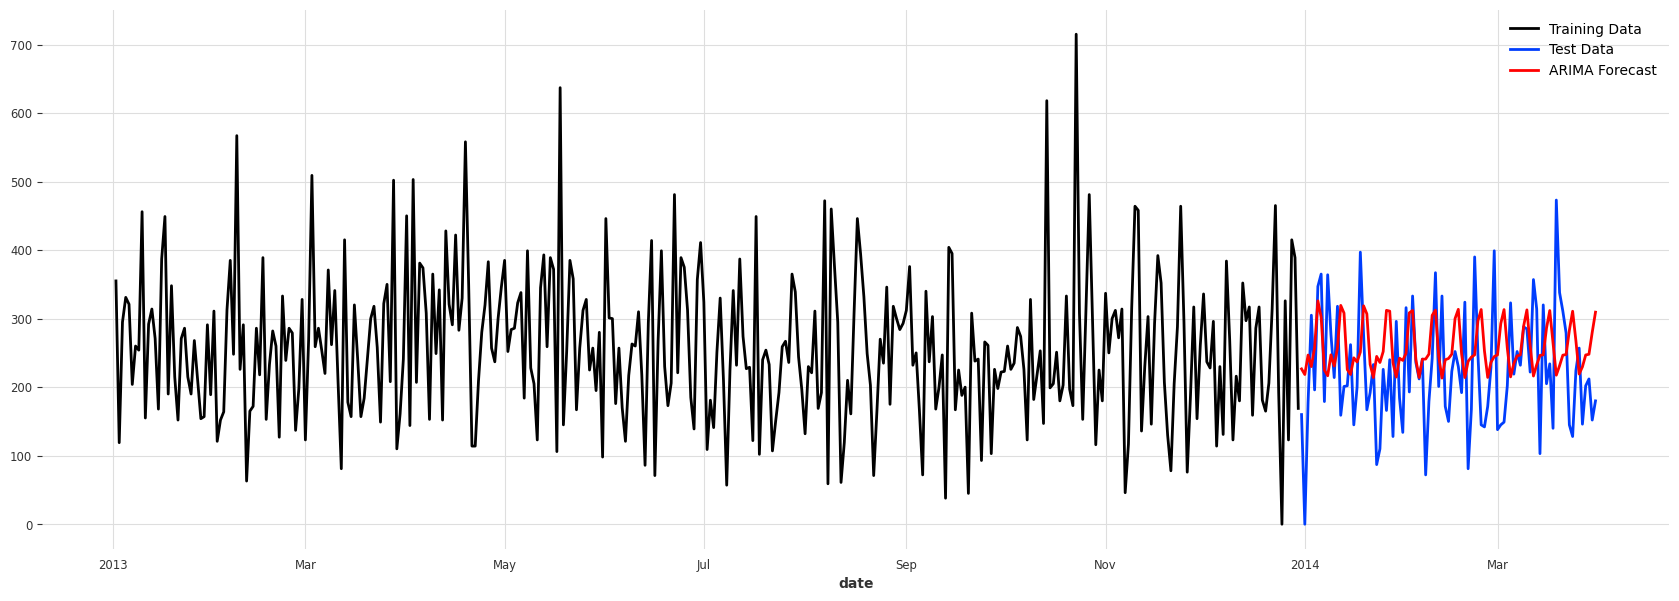

In [ ]:
# Fit the ARIMA model on the training data
arima_model.fit(train)

# Forecast the next values (the same length as the test set)
arima_forecast = arima_model.predict(len(test))

# Plot ARIMA forecast vs actual data
plt.figure(figsize=(21, 7))  # Adjust the figure size (width, height)
train.plot(label='Training Data')
test.plot(label='Test Data')
arima_forecast.plot(label='ARIMA Forecast', color='red')

The model is trained on the training data, and forecasts are generated for the test period. The forecast is then plotted against the actual sales data.

In [ ]:
from darts.metrics import mae, rmse
import pandas as pd

# Ensure the predicted series matches the same time index as the test set
arima_forecast = arima_forecast.slice_intersect(test)

# Compute evaluation metrics
mae_value = mae(test, arima_forecast)
rmse_value = rmse(test, arima_forecast)


# Print the evaluation results
print(f"Evaluation Metrics for ARIMA Model:")
print(f"Mean Absolute Error (MAE): {mae_value:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_value:.4f}")




Evaluation Metrics for ARIMA Model:
Mean Absolute Error (MAE): 81.5778
Root Mean Squared Error (RMSE): 97.6126


 Since the data shows clear seasonal patterns, we could use SARIMA to capture the seasonality